In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

In [36]:
data = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')

In [37]:
cust = pd.DataFrame(data.copy().customer_unique_id.drop_duplicates())
cust['cluster'] = np.random.randint(0, 4, cust.shape[0])

,customer_unique_id,cluster
0,b7d76e111c89f7ebf14761390f0f7d17,0
2,4854e9b3feff728c13ee5fc7d1547e92,2
3,009b0127b727ab0ba422f6d9604487c7,0
4,830d5b7aaa3b6f1e9ad63703bec97d23,2
5,0eb1ee9dba87f5b36b4613a65074337c,1


### **Data Analysis - Cluster**

#### **RFM**

**Recency**

**Frequency**

**Monetary**

#### **Customer Behaviour**

**Waktu Pembelian**

In [38]:
segm = data.copy().merge(cust, on='customer_unique_id')
segm.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,order_item_count,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,cluster
0,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,39.99,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0,0
1,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,32.90,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0,0
2,4854e9b3feff728c13ee5fc7d1547e92,683c54fc24d40ee9f8a6fc179fd9856c,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,...,59.50,1.0,telefonia,telephony,1.0,credit_card,3.0,75.06,1.0,2
3,009b0127b727ab0ba422f6d9604487c7,622e13439d6b5a0b486c435618b2679e,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,...,NaN,1.0,diversas,miscellaneous,1.0,credit_card,2.0,40.95,1.0,0
4,830d5b7aaa3b6f1e9ad63703bec97d23,86dc2ffce2dfff336de2f386a786e574,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,44.99,3.0,beleza_saude,health_beauty,1.0,credit_card,1.0,143.46,1.0,2


In [78]:
segm['day_num'] = segm.order_purchase_timestamp.dt.weekday
segm['day_name'] = segm.order_purchase_timestamp.dt.strftime('%A')

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,cluster,day_num,day_name
0,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0,0,6,Sunday
1,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0,0,6,Sunday
2,4854e9b3feff728c13ee5fc7d1547e92,683c54fc24d40ee9f8a6fc179fd9856c,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,...,telefonia,telephony,1.0,credit_card,3.0,75.06,1.0,2,0,Monday
3,009b0127b727ab0ba422f6d9604487c7,622e13439d6b5a0b486c435618b2679e,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,...,diversas,miscellaneous,1.0,credit_card,2.0,40.95,1.0,0,1,Tuesday
4,830d5b7aaa3b6f1e9ad63703bec97d23,86dc2ffce2dfff336de2f386a786e574,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,beleza_saude,health_beauty,1.0,credit_card,1.0,143.46,1.0,2,3,Thursday


In [81]:
day = segm.groupby(['cluster','day_num','day_name'])['customer_unique_id'].nunique().reset_index().rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})
day.head()

,cluster,day_num,day_name,n_customers
0,0,0,Monday,3967
1,0,1,Tuesday,4022
2,0,2,Wednesday,3871
3,0,3,Thursday,3577
4,0,4,Friday,3498


In [89]:
day['proportion_n_cust'] = day.n_customers/day.groupby(['cluster'])['n_customers'].transform(sum)*100
day.head()

,cluster,day_num,day_name,n_customers,proportion_n_cust
0,0,0,Monday,3967,16.106374
1,0,1,Tuesday,4022,16.329679
2,0,2,Wednesday,3871,15.716606
3,0,3,Thursday,3577,14.522940
4,0,4,Friday,3498,14.202192


In [93]:
daypiv = day.pivot_table(index='cluster', columns='day_name', values='proportion_n_cust')

Text(0, 0.5, '% Proporsi')

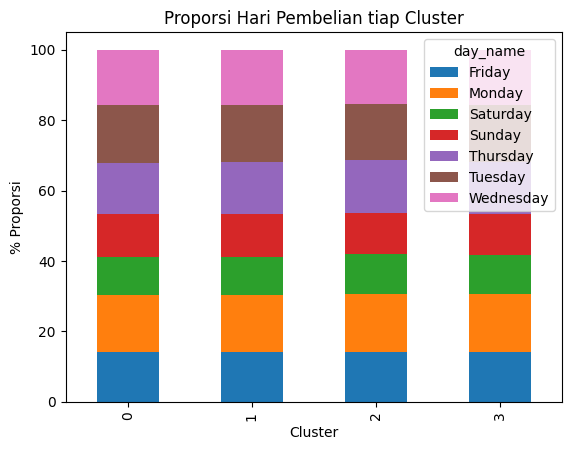

In [96]:
# create stacked bar chart for students DataFrame
daypiv.plot(kind='bar', stacked=True)

# Add Title and Labels
plt.title('Proporsi Hari Pembelian tiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('% Proporsi')

**Produk**

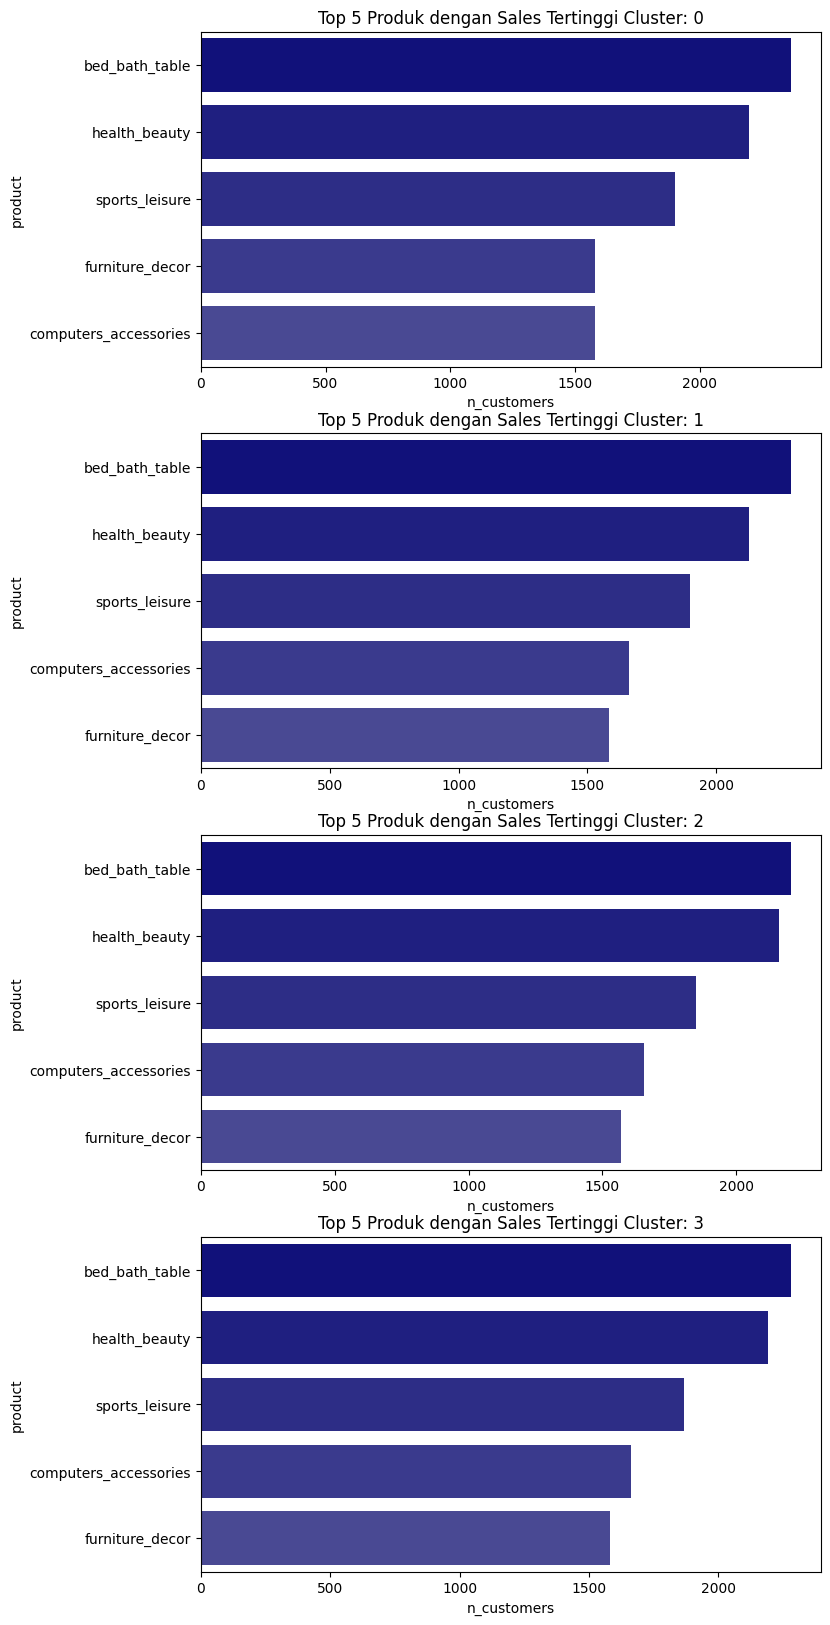

In [58]:
prod = segm.groupby(['cluster','product_category_name_english'])['customer_unique_id'].nunique().reset_index().rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})

clus = prod.cluster.unique()

# Viz
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
fig, axes = plt.subplots(len(clus),1, figsize=(8, 20))
for i, val in enumerate(clus):
    sns.barplot(data=prod.query(f"cluster == {val}").nlargest(5, columns='n_customers'), x = 'n_customers', y='product', palette=c1, ax=axes[i])
    axes[i].title.set_text(f'Top 5 Produk dengan Sales Tertinggi Cluster: {val}')

# plt.show()